# Libraries 👨‍🏫

In [1]:
# Data
import polars as pl
import numpy as np

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.disable_max_rows()
sns.set_theme(
    style="whitegrid"
)

# Some tools
from pathlib import Path

# Data 🤹‍♀️

## Load ur data 📦

In [2]:
folder_path = Path('../data/')

In [3]:
train_df = pl.read_csv(folder_path / 'train.csv').drop('id')
test_df = pl.read_csv(folder_path / 'test.csv').drop('id')
sample_df = pl.read_csv(folder_path / 'sample_submission.csv')

In [4]:
train_df.head()

person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
i64,i64,str,f64,str,str,i64,f64,f64,str,i64,i64
37,35000,"""RENT""",0.0,"""EDUCATION""","""B""",6000,11.49,0.17,"""N""",14,0
22,56000,"""OWN""",6.0,"""MEDICAL""","""C""",4000,13.35,0.07,"""N""",2,0
29,28800,"""OWN""",8.0,"""PERSONAL""","""A""",6000,8.9,0.21,"""N""",10,0
30,70000,"""RENT""",14.0,"""VENTURE""","""B""",12000,11.11,0.17,"""N""",5,0
22,60000,"""RENT""",2.0,"""MEDICAL""","""A""",6000,6.92,0.1,"""N""",3,0


## Usefull info 🚀

In [5]:
train_df.schema

Schema([('person_age', Int64),
        ('person_income', Int64),
        ('person_home_ownership', String),
        ('person_emp_length', Float64),
        ('loan_intent', String),
        ('loan_grade', String),
        ('loan_amnt', Int64),
        ('loan_int_rate', Float64),
        ('loan_percent_income', Float64),
        ('cb_person_default_on_file', String),
        ('cb_person_cred_hist_length', Int64),
        ('loan_status', Int64)])

In [6]:
train_df.to_pandas().select_dtypes('int', 'float').corr()['loan_status']

person_age                   -0.001130
person_income                -0.169956
loan_amnt                     0.144982
cb_person_cred_hist_length   -0.003030
loan_status                   1.000000
Name: loan_status, dtype: float64

In [7]:
train_df.null_count()

person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
train_df.select(pl.col('loan_status').value_counts())

loan_status
struct[2]
"{1,8350}"
"{0,50295}"


In [8]:
train_df.group_by(
    pl.col('person_home_ownership')
).len()

person_home_ownership,len
str,u32
"""OWN""",3138
"""RENT""",30594
"""OTHER""",89
"""MORTGAGE""",24824


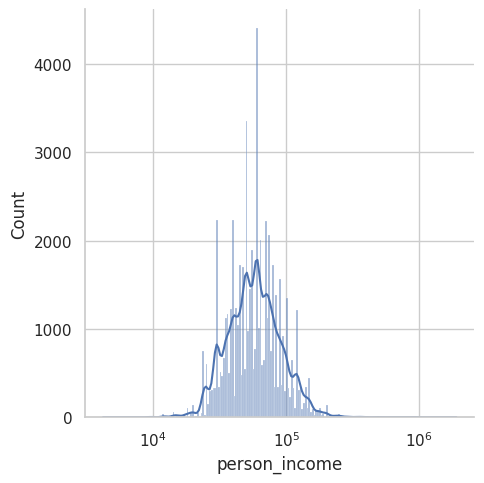

In [9]:
sns.displot(
    data=train_df, x='person_income',
    log_scale=True, kde=True
)

<Figure size 1200x600 with 0 Axes>

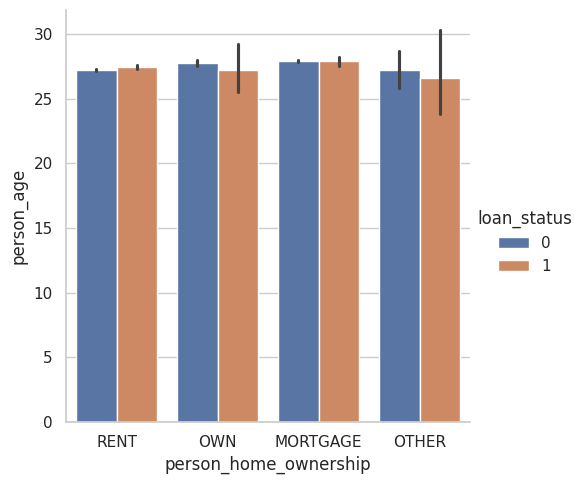

In [10]:
plt.figure(figsize=(12, 6))
sns.catplot(
    data=train_df, kind='bar',
    x='person_home_ownership', y='person_age', 
    hue='loan_status'
)

In [1]:
plt.figure(figsize=(12, 6))
sns.relplot(
    data=train_df, x='person_income', y='person_age', hue='loan_status'
)

NameError: name 'plt' is not defined

## Check if we can add dataset

In [9]:
original_dataset = pl.read_csv(folder_path / 'original_dataset.csv')
original_dataset.head()

person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
i64,i64,str,f64,str,str,i64,f64,i64,f64,str,i64
22,59000,"""RENT""",123.0,"""PERSONAL""","""D""",35000,16.02,1,0.59,"""Y""",3
21,9600,"""OWN""",5.0,"""EDUCATION""","""B""",1000,11.14,0,0.1,"""N""",2
25,9600,"""MORTGAGE""",1.0,"""MEDICAL""","""C""",5500,12.87,1,0.57,"""N""",3
23,65500,"""RENT""",4.0,"""MEDICAL""","""C""",35000,15.23,1,0.53,"""N""",2
24,54400,"""RENT""",8.0,"""MEDICAL""","""C""",35000,14.27,1,0.55,"""Y""",4


In [10]:
train_df.head()

person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
i64,i64,str,f64,str,str,i64,f64,f64,str,i64,i64
37,35000,"""RENT""",0.0,"""EDUCATION""","""B""",6000,11.49,0.17,"""N""",14,0
22,56000,"""OWN""",6.0,"""MEDICAL""","""C""",4000,13.35,0.07,"""N""",2,0
29,28800,"""OWN""",8.0,"""PERSONAL""","""A""",6000,8.9,0.21,"""N""",10,0
30,70000,"""RENT""",14.0,"""VENTURE""","""B""",12000,11.11,0.17,"""N""",5,0
22,60000,"""RENT""",2.0,"""MEDICAL""","""A""",6000,6.92,0.1,"""N""",3,0


In [40]:
df_conc = pl.concat(
    [
        original_dataset,
        train_df.select(pl.col(original_dataset.columns)),
    ],
    how='vertical'
)
df_conc

person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
i64,i64,str,f64,str,str,i64,f64,i64,f64,str,i64
22,59000,"""RENT""",123.0,"""PERSONAL""","""D""",35000,16.02,1,0.59,"""Y""",3
21,9600,"""OWN""",5.0,"""EDUCATION""","""B""",1000,11.14,0,0.1,"""N""",2
25,9600,"""MORTGAGE""",1.0,"""MEDICAL""","""C""",5500,12.87,1,0.57,"""N""",3
23,65500,"""RENT""",4.0,"""MEDICAL""","""C""",35000,15.23,1,0.53,"""N""",2
24,54400,"""RENT""",8.0,"""MEDICAL""","""C""",35000,14.27,1,0.55,"""Y""",4
…,…,…,…,…,…,…,…,…,…,…,…
34,120000,"""MORTGAGE""",5.0,"""EDUCATION""","""D""",25000,15.95,0,0.21,"""Y""",10
28,28800,"""RENT""",0.0,"""MEDICAL""","""C""",10000,12.73,1,0.35,"""N""",8
23,44000,"""RENT""",7.0,"""EDUCATION""","""D""",6800,16.0,1,0.15,"""N""",2


In [52]:
df_conc_clear = df_conc.unique(pl.col('*'))

In [53]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from tqdm.notebook import tqdm

In [54]:
X = df_conc_clear.drop('loan_status')
y = df_conc_clear.select('loan_status')

In [55]:
cat_features = X.select(pl.col(pl.String)).columns

In [57]:
cv =StratifiedKFold()

In [58]:
models_list = []
metrics_list = []

pbar = tqdm(cv.split(X, y), total=cv.get_n_splits())
for train_idx, test_idx, in pbar:
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    train_pool = Pool(X_train.to_pandas(), y_train.to_pandas(), cat_features=cat_features)
    test_pool = Pool(X_test.to_pandas(), y_test.to_pandas(), cat_features=cat_features)

    model = CatBoostClassifier(
        iterations=5000, 
        learning_rate=0.05,
        eval_metric='AUC',
        loss_function='Logloss',
        random_seed=2024
    )

    model.fit(
        train_pool, 
        eval_set=test_pool,
        early_stopping_rounds=150,
        verbose=500
    )

    y_pred = model.predict_proba(X_test.to_pandas())[:, 1]
    score = roc_auc_score(y_test, y_pred)
    pbar.set_description(f'ROC-AUC: {score:.4f}')

    models_list.append(model)
    metrics_list.append(score)

print(f'All metrics: {metrics_list}')
print(f'Mean ROC-AUC: {np.mean(metrics_list) - np.std(metrics_list)}')

  0%|          | 0/5 [00:00<?, ?it/s]

0:	test: 0.8620903	best: 0.8620903 (0)	total: 41.9ms	remaining: 3m 29s
500:	test: 0.9525656	best: 0.9525656 (500)	total: 14s	remaining: 2m 5s
1000:	test: 0.9572028	best: 0.9572162 (984)	total: 28.4s	remaining: 1m 53s
1500:	test: 0.9588638	best: 0.9588837 (1494)	total: 43.1s	remaining: 1m 40s
2000:	test: 0.9596860	best: 0.9596867 (1998)	total: 57.9s	remaining: 1m 26s
2500:	test: 0.9600206	best: 0.9600460 (2489)	total: 1m 12s	remaining: 1m 12s
3000:	test: 0.9603689	best: 0.9604394 (2954)	total: 1m 27s	remaining: 58s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9604393868
bestIteration = 2954

Shrink model to first 2955 iterations.
0:	test: 0.8617948	best: 0.8617948 (0)	total: 43.3ms	remaining: 3m 36s
500:	test: 0.9522977	best: 0.9523044 (497)	total: 13.8s	remaining: 2m 3s
1000:	test: 0.9559913	best: 0.9559930 (991)	total: 28.2s	remaining: 1m 52s
1500:	test: 0.9574956	best: 0.9575140 (1492)	total: 43.1s	remaining: 1m 40s
2000:	test: 0.9584263	best: 0.9584384 (1996)

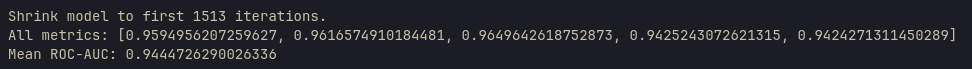

In [67]:
df_conc_clear.write_csv('../data/concated.csv')

## Weighted prediction?

In [61]:
weights = [weight / np.sum(metrics_list) for weight in metrics_list]
weights

[0.20039372262857483,
 0.200116057770858,
 0.19976118271259008,
 0.2003299140037067,
 0.19939912288427036]

In [62]:
y_subm = np.zeros(sample_df.shape[0])

In [63]:
for model, weight in tqdm(zip(models_list, weights), total=len(weights)):
    y_pred = model.predict_proba(test_df.to_pandas())[:, 1] * weight
    y_subm += y_pred
y_subm

  0%|          | 0/5 [00:00<?, ?it/s]

array([0.9997503 , 0.04080181, 0.52977795, ..., 0.00795868, 0.2047507 ,
       0.96876357])

In [64]:
sample_df = sample_df.with_columns(loan_status = y_subm)

In [65]:
folder_save = Path('../subs')

In [66]:
sample_df.write_csv(folder_save / 'cleared_dataset_weigted_predict.csv')